# Section 02 ノート

このノートでは ch02 の加工済みデータを読み込み、簡単な確認を行います。


## データ読込


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np

# プロジェクトルートからの絶対パスで指定
DATA_CSV = Path('/Users/macmini2023/Documents/intro-statistical-modeling-data-analysis/data/02_processed/ch02/data.csv')

# 読み込み
df = pd.read_csv(DATA_CSV)

# 先頭確認と基本情報
display(df.head())
display(df.describe(include='all'))


,data
0,2.0
1,2.0
2,4.0
3,6.0
4,4.0


,data
count,50.00000
mean,3.56000
std,1.72804
min,0.00000
25%,2.00000
50%,3.00000
75%,4.75000
max,7.00000


In [3]:
df.value_counts().sort_index()

data
0.0      1
1.0      3
2.0     11
3.0     12
4.0     10
5.0      5
6.0      4
7.0      4
Name: count, dtype: int64

array([[<Axes: title={'center': 'data'}>]], dtype=object)

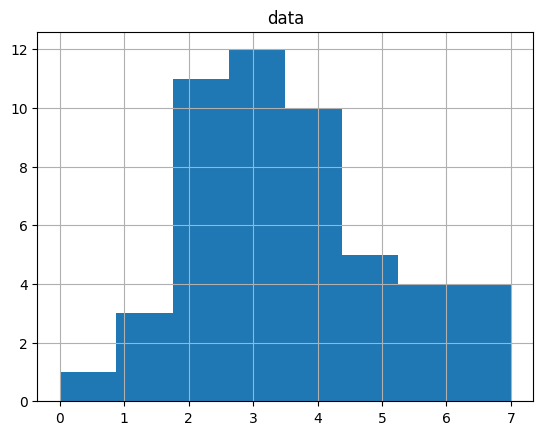

In [4]:
df.hist(bins=8)

In [5]:
df.var()

data    2.986122
dtype: float64

In [6]:
df.mean()

data    3.56
dtype: float64

In [7]:
df.median()

data    3.0
dtype: float64

In [8]:
df.std()

data    1.72804
dtype: float64

In [9]:
np.sqrt(df.var())

data    1.72804
dtype: float64

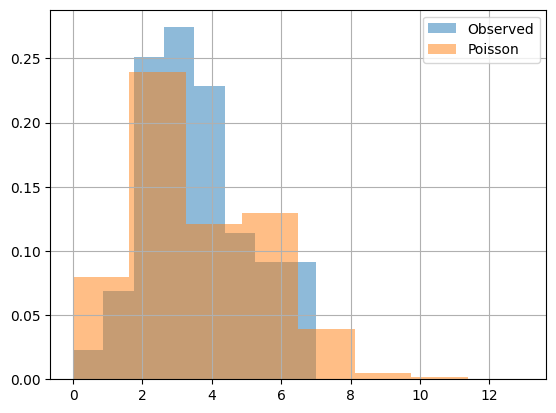

In [10]:
# Poisson分布の生成（母数は観測データの平均）
import numpy as np
import matplotlib.pyplot as plt

lam = 3.56
rng = np.random.default_rng(42)
samples = rng.poisson(lam, size=10000)

plt.hist(df.values, bins=8, density=True, alpha=0.5, label='Observed')
plt.hist(samples, bins=8, density=True, alpha=0.5, label='Poisson')
plt.legend()
plt.grid()

# ポアソン分布のパラメータ推定



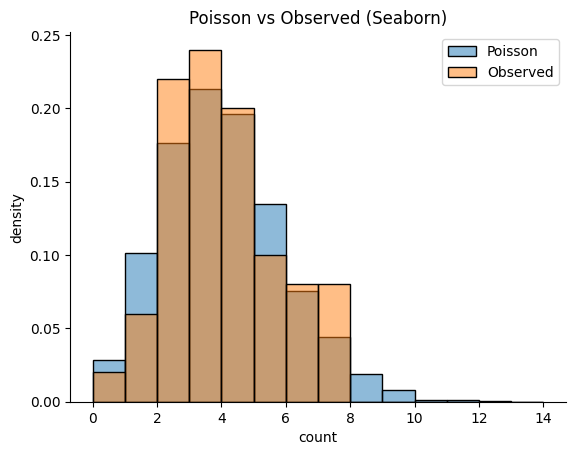

In [11]:
# Seaborn で可視化（Poisson vs Observed）
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


lam = 3.56
rng = np.random.default_rng(42)
samples = rng.poisson(lam, size=10000)

# bins を両データの最大値に合わせて揃える
max_val = int(max(np.max(samples), df['data'].max()))
bins = list(range(0, max_val + 2))

fig, ax = plt.subplots()
sns.histplot(samples, bins=bins, stat='density', alpha=0.5, color='tab:blue', label='Poisson', ax=ax)
sns.histplot(df['data'], bins=bins, stat='density', alpha=0.5, color='tab:orange', label='Observed', ax=ax)
ax.set_title('Poisson vs Observed (Seaborn)')
ax.set_xlabel('count')
ax.set_ylabel('density')
ax.legend()
sns.despine()
plt.show()



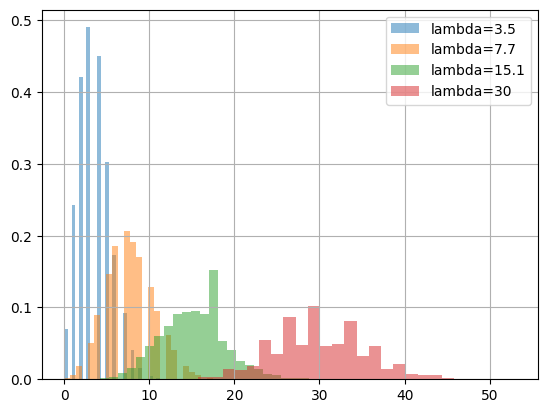

In [12]:
# Poisson分布の生成（母数は観測データの平均）
import numpy as np
import matplotlib.pyplot as plt

lam = 3.56
for lam in [3.5, 7.7, 15.1, 30]:
    rng = np.random.default_rng(42)
    samples = rng.poisson(lam, size=10000)

    plt.hist(samples, bins=30, density=True, alpha=0.5, label=f'lambda={lam}')
    plt.legend()
plt.grid()

# ポアソン分布のパラメータ推定



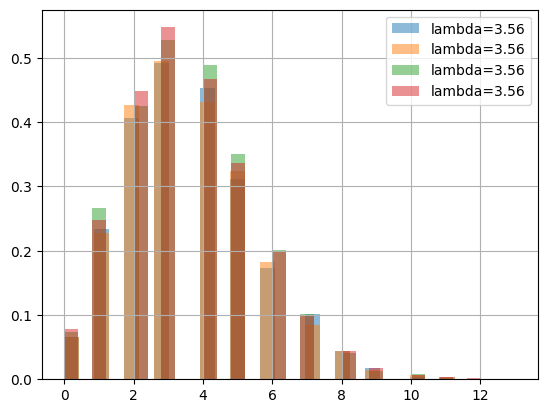

In [13]:
# Poisson分布の生成（母数は観測データの平均）
import numpy as np
import matplotlib.pyplot as plt

lam = 3.56
for seed in [42, 100, 200, 300]:
    rng = np.random.default_rng(seed)
    samples = rng.poisson(lam, size=10000)

    plt.hist(samples, bins=30, density=True, alpha=0.5, label=f'lambda={lam}')
    plt.legend()
plt.grid()

# ポアソン分布のパラメータ推定



In [ ]:
# 最尤推定
def factorial(n):
    n = int(n)
    if n < 0:
        raise ValueError("n must be non-negative")
    if n in (0, 1):
        return 1
    result = 1
    for k in range(2, n + 1):
        result *= k
    return result

def poisson(y, lam):
    return (lam ** y) * np.exp(-lam) / factorial(y)


def likelihood(y, lam):
    p_y_lam = []
    for i in range(len(y)):
        p_y_lam.append(poisson(y[i], lam))
    p_y_lam = np.array(p_y_lam)
    return np.prod(p_y_lam)

y = df["data"].values.astype(int)
L = likelihood(y, 3.56)
print(L)


5.8541807138235296e-43


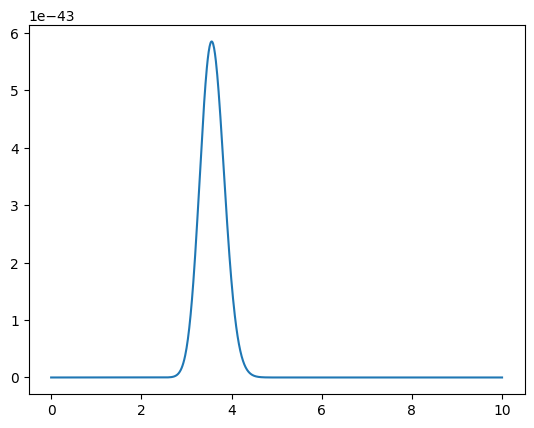

In [47]:
# lamdaを走査してLikelihoodを計算
lam_grid = np.linspace(0, 10, 1000)
L_vals = [likelihood(y, lam) for lam in lam_grid]

# 可視化
plt.plot(lam_grid, L_vals)
plt.show()

In [52]:
# 尤度最大の時のlamda
lam_dot = lam_grid[np.argmax(L_vals)]
lam_dot

np.float64(3.5635635635635636)

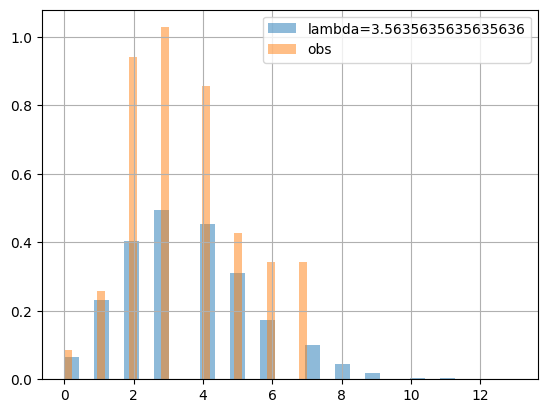

In [56]:
# Poisson分布の生成（母数は観測データの平均）
import numpy as np
import matplotlib.pyplot as plt

lam = lam_dot
rng = np.random.default_rng(42)
samples = rng.poisson(lam, size=10000)

plt.hist(samples, bins=30, density=True, alpha=0.5, label=f'lambda={lam}')
plt.hist(df["data"], bins=30, density=True, alpha=0.5, label=f'obs')
plt.legend()
plt.grid()

# ポアソン分布のパラメータ推定



In [58]:
pd.DataFrame(samples).describe()

,0
count,10000.000000
mean,3.573100
std,1.888601
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,13.000000


In [59]:
pd.DataFrame(samples).var()

0    3.566813
dtype: float64

<Axes: >

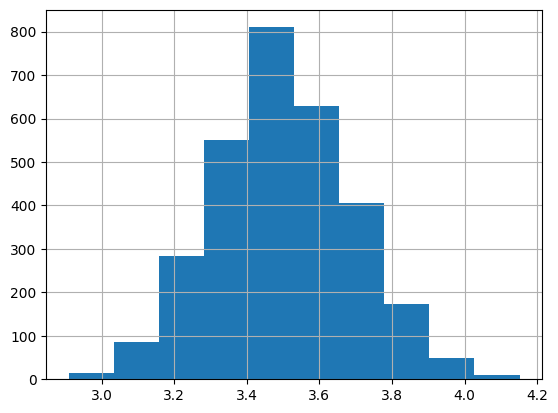

In [ ]:
# 最大尤度推定時のlamdaの標準誤差
import numpy as np
import matplotlib.pyplot as plt

lam = 3.5


buf_lam_dot = []
for i in range(3009):
    rng = np.random.default_rng(i)
    y_smpl = rng.poisson(lam, size=100)

    # 最尤推定
    # lamdaを走査してLikelihoodを計算
    lam_grid = np.linspace(2, 5, 100)
    L_vals = [likelihood(y_smpl, lam) for lam in lam_grid]
    # 尤度最大の時のlamda
    lam_dot = lam_grid[np.argmax(L_vals)]
    lam_dot
    buf_lam_dot.append(lam_dot)

sr_lam = pd.Series(buf_lam_dot)
sr_lam.hist()
